# ESCUELA COLOMBIANA DE INGENIERÍA
# PRINCIPIOS Y TECNOLOGÍAS IA 2025-2
## REDES NEURONALES
## LABORATORIO 1/4

**OBJETIVOS**

Desarrollar competencias básicas para:
1. Modelar y resolver problemas usando redes neuronales
2. Implementar los algoritmos hacia adelante (FEED-FORWARD) y hacia atrás con  aprendizaje (BACKPROPAGATION)
3. Apropiar un framework para redes neuronales (*keras*)

**ENTREGABLE**


*Reglas para el envío de los entregables*:

* **Forma de envío:**
Esta tarea se debe enviar únicamente a través de la plataforma Moodle en la actividad definida. Se tendrán dos entregas: inicial y final.

* **Formato de los archivos:**
Incluyan en un archivo *.zip* los archivos correspondientes al laboratorio.

* **Nomenclatura para nombrar los archivos:**
El archivo deberá ser renombrado, “RN-lab-” seguido por los usuarios institucionales de los autores ordenados alfabéticamente (por ejemplo, se debe adicionar pedroperez al nombre del archivo, si el correo electrónico de Pedro Pérez es pedro.perez@mail.escuelaing.edu.co)




# PARTE I. IMPLEMENTACIÓN DE RED NEURONAL

Para este apartado se va a implementar una red neuronal con algoritmo de aprendizaje, en este caso propagación hacia atras del error.

*Introducido en la década de 1960 y popularizado casi 30 años después (1989) por Rumelhart, Hinton y Williams en el artículo titulado «Learning representations by back-propagating errors».*

## IMPLEMENTACIÓN DE RED NEURONAL CON PROPAGACIÓN HACIA ATRÁS

Implementar una red neuronal totalmente conectada desde su definición simple; calculando una salida $\check{Y} (Yp)$ para unas entradas $X$.

**Propiedades y parámetros:**

*   Tarea: **Clasificación multiple**
*   Tipo de capas: **Densas**
*   Métrica para evaluación : **ACCURACY**

<div>
<img src="https://cdn.prod.website-files.com/660ef16a9e0687d9cc27474a/662c426738658d748af1b20d_644af5900694f1102fb9b470_classification_guide_apc05.png" width="350"/>
</div>

> **Funciones de activación**

*   Función de activación en *Capas ocultas* : **ReLU**

<div>
<img src="https://intuitivetutorial.com/wp-content/uploads/2023/07/ReLU-1.png" width="350"/>
</div>

*   Función de activación en *Capa de salida* : **Sigmoide**

<div>
<img src="https://doimages.nyc3.cdn.digitaloceanspaces.com/010AI-ML/content/images/2018/06/sigm.png" width="350"/>
</div>

> **Funcion de costo**

*   Función de costo/perdida «error»: **Entropia Cruzada «Cross-Entropy»**

<div>
<img src="https://framerusercontent.com/images/jiDTkbQC7DPO2z2XmxqoeMsrkA.webp?width=1300&height=508" width="450"/>
</div>







## Paso 1. Derivadas

*Incluya en este apartado el proceso de la derivación de las funciones*

---
**Derivada función Sigmoide:**

La función sigmoide se define como:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$


Paso a paso para derivar $\sigma(x)$

1. Escribe la función original

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

2. Aplica la regla de la derivada de una función racional

Usamos la regla de la derivada de una función tipo:

$$
f(x) = \frac{1}{g(x)} \Rightarrow f'(x) = -\frac{g'(x)}{(g(x))^2}
$$

En este caso:

- \( g(x) = 1 + e^{-x} \)
- \( g'(x) = -e^{-x} \)

Entonces:

$$
\sigma'(x) = -\frac{-e^{-x}}{(1 + e^{-x})^2}
$$

3. Simplifica la expresión

$$
\sigma'(x) = \frac{e^{-x}}{(1 + e^{-x})^2}
$$


Forma alternativa usando la propia sigmoide

Una forma elegante de expresar la derivada es en términos de la propia función sigmoide:

$$
\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))
$$

---
**Derivada función ReLU**

La función ReLU se define como:

$$
f(x) = \max(0, x)
$$

Es decir:

- Si \( x > 0 \), entonces \( f(x) = x \)
- Si \( x \leq 0 \), entonces \( f(x) = 0 \)



Derivada de ReLU

La derivada de ReLU se define por partes:

$$
f'(x) =
\begin{cases}
1 & \text{si } x > 0 \\
0 & \text{si } x < 0 \\
\text{indefinida} & \text{en } x = 0
\end{cases}
$$

---
**Derivada función de costo: Entropia Cruzada**

Derivada de la Entropía Cruzada Multiclase

La función de pérdida de entropía cruzada mide la diferencia entre la distribución verdadera \( p(x) \) y la distribución predicha \( q(x) \) por el modelo.

Definición

Para un conjunto de clases \( x \), la entropía cruzada se define como:

$$
H(p, q) = - \sum_{x \in \text{classes}} p(x) \log q(x)
$$

Donde:

- \( p(x) \): distribución verdadera (one-hot en clasificación supervisada)
- \( q(x) \): distribución predicha (por ejemplo, salida de softmax)

---

¿Qué significa?

- Si el modelo predice correctamente, \( q(x) \) será alto donde \( p(x) = 1 \), y la pérdida será baja.
- Si el modelo se equivoca, \( q(x) \) será bajo donde \( p(x) = 1 \), y la pérdida será alta.

---

Derivada con respecto a la entrada del modelo (pre-softmax)

Supongamos que el modelo produce logits \( z_i \), y que:

$$
q(x_i) = \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}}
$$

La derivada de la pérdida con respecto a cada logit \( z_i \) es:

$$
\frac{\partial H}{\partial z_i} = q(x_i) - p(x_i)
$$



## Paso 2. Implementación del código para ANN (Dense)

### LIBRERÍA NECESARIA

In [2]:
import numpy as np
from abc import ABC, abstractmethod


### FUNCIONES DE BASE: MÉTRICA, COSTO Y ACTIVACIÓN

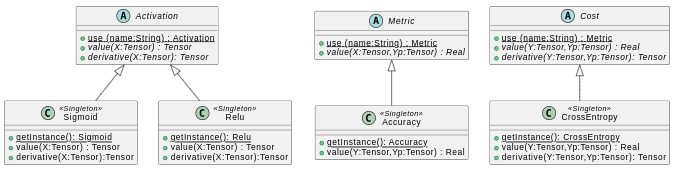

### MÉTRICA

In [3]:
import numpy as np
from abc import ABC, abstractmethod

class Metric(ABC):
    """ Abstracta: define entradas, salidas y el comportamiento inicial de los métodos clave para cualquier metrica
    Representa la metrica de una red neuronal
    """
    @classmethod
    def use(self, name: str) -> "Metric":
        """ obtiene metrica (OBJ) a partir del nombre
        Args:
          name (str): nombre esperado de la metrica
        Returns:
          self (Metric): objeto metrica
        """
        metrics_map = {
            "accuracy": Accuracy
        }

        metric_class = metrics_map.get(name.lower())

        if metric_class is None:
            raise ValueError(f"La métrica '{name}' no es válida.")

        return metric_class()

    @abstractmethod
    def value(self, Y: np.ndarray, Yp: np.ndarray):
        """ computa el desempeño de la red
        Args:
          Y (ndarray): valores de salidas esperadas (etiquetadas)
          Yp (ndarray): valores de salidas obtenidas
        Return:
          A (float): valor del desempeño
        """
        pass

In [4]:
# Documentar los métodos implementados
class Accuracy(Metric):
  """ Metrica de exactitud (acertados / totales). Implementa Metric
  """
  def Acurracy(self):
    pass

  ## Usamos Yp como el resultado y Y como el esperado y comparamos con el metodo mean de numpy.
  def value(self, Y_true, Y_pred):
        Y_true_labels = np.argmax(Y_true, axis=1)
        Y_pred_labels = np.argmax(Y_pred, axis=1)
        return np.mean(Y_true_labels == Y_pred_labels)

#### Testeos de Accuracy
- En este caso se realizaron dos testeos:
    1. Accuracy mayor a 0.6, la salida debe ser 1
    2. Accuracy menor o igual a 0.6, la salida debe ser el accurracy

In [5]:
# Adicione los casos de prueba de los métodos implementados
import unittest

class TestAccuracy(unittest.TestCase):
    def setUp(self):
        self.metric = Metric.use(name="accuracy")

    def test_should_return_one(self):
        Y = np.array([0.1, 0.2, 0.3, 0.4])
        Yp = np.array([0.1, 0.2, 0.4 , 0.4])
        self.assertEqual(self.metric.value(Y=Y,Yp=Yp),1.0)

    def test_should_return_zero(self):
        Y = np.array([0.1, 0.2, 0.3, 0.4])
        Yp = np.array([0.1, 0.2, 0.4 , 0.5])
        self.assertEqual(self.metric.value(Y=Y,Yp=Yp),0.5)


if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


EE
ERROR: test_should_return_one (__main__.TestAccuracy.test_should_return_one)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipython-input-1880705940.py", line 11, in test_should_return_one
    self.assertEqual(self.metric.value(Y=Y,Yp=Yp),1.0)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Accuracy.value() got an unexpected keyword argument 'Y'

ERROR: test_should_return_zero (__main__.TestAccuracy.test_should_return_zero)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipython-input-1880705940.py", line 16, in test_should_return_zero
    self.assertEqual(self.metric.value(Y=Y,Yp=Yp),0.5)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Accuracy.value() got an unexpected keyword argument 'Y'

----------------------------------------------------------------------
Ran 2 tests in 0.008s

FAILED (errors=2)


### COSTO

In [6]:
class Cost(ABC):
  """ Abstracta: define entradas, salidas y el comportamiento inicial de los métodos clave para cualquier función de costo
  Representa la función de costo o error de una red neuronal
  """
  @classmethod
  def use(self, name: str) -> "Cost":
    """ obtiene metrica (OBJ) a partir del nombre
        Args:
          name (str): nombre esperado de la cost
        Returns:
          self (Cost): objeto cost
        """
    cost_map = {
      "crossentropy": CrossEntropy
    }

    cost_class = cost_map.get(name.lower())

    if cost_class is None:
      raise ValueError(f"La funcion de costo '{name}' no es válida.")

    return cost_class()

  def value(self, Y: np.ndarray, Yp: np.ndarray) -> float:
    """ computa la función de costo
    Args:
      Y (ndarray): valores de salida esperados
      Yp (ndarray): valores de salida obtenidos
    Returns:
      S (float): valor de computo de la función de costo
    """
    pass

  def derivative(self, Y: np.ndarray, Yp: np.ndarray) -> np.ndarray:
    """ computa la derivada de la función de costo (gradiente) <elemento por elemento>
    Args:
      Y (ndarray): valores de salida esperador
      Yp (ndarray): valores de salida obtenidos
    Returns:
      ∇E(X) (ndarray): valores para la derivada de función de costo
    """
    pass

In [7]:
class CrossEntropy(Cost):
    """Función de costo Entropía Cruzada. Implementa Cost.
    Penaliza errores de predicción en problemas de clasificación.
    """

    def CrossEntropy(self):
        pass  # Método vacío, no necesario para la lógica principal

    def value(self, Y: np.ndarray, Yp: np.ndarray) -> float:
        """Computa el valor de la función de costo Cross Entropy.
        Args:
            Y (ndarray): valores esperados (etiquetas)
            Yp (ndarray): valores obtenidos (predicciones)
        Returns:
            float: valor del error total
        """
        eps = 1e-15  # Evita log(0) para estabilidad numérica
        Yp = np.clip(Yp, eps, 1 - eps)
        result = -np.sum(Y * np.log(Yp))
        return result

    def derivative(self, Y: np.ndarray, Yp: np.ndarray) -> np.ndarray:
        """Computa la derivada de la función de costo Cross Entropy.
        Args:
            Y (ndarray): valores esperados
            Yp (ndarray): valores obtenidos
        Returns:
            ndarray: gradiente elemento por elemento
        """
        return Yp - Y

#### Testeos de Cross Entropy
- En este caso se realizaron tres testeos:
    1. Cross Entropy menor a 1, un error pequeño
    2. Cross Entropy mayor a 1, un error grande
    3. Derivada correcta

In [8]:
# Adicione los casos de prueba de los métodos implementados

import unittest

class TestCrossEntropy(unittest.TestCase):

    def setUp(self):
        self.crossEntropy = Cost.use(name="crossentropy")

    def test_value_method_good_error(self):
        Y = np.array([0, 0, 0, 1])
        Yp = np.array([0.2, 0.1, 0.1, 0.6])
        self.assertTrue(self.crossEntropy.value(Y=Y,Yp=Yp)<1)

    def test_value_method_bad_error(self):
        Y = np.array([0, 0, 0, 1])
        Yp = np.array([0.6, 0.1, 0.1, 0.2])
        self.assertTrue(self.crossEntropy.value(Y=Y,Yp=Yp)>1)

    def test_derivate_method(self):
        Y = np.array([0, 0, 0, 1])
        Yp = np.array([0.6, 0.1, 0.1, 0.2])
        result = (Yp - Y)
        np.testing.assert_array_equal(self.crossEntropy.derivative(Y=Y,Yp=Yp),result)

if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

EE...
ERROR: test_should_return_one (__main__.TestAccuracy.test_should_return_one)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipython-input-1880705940.py", line 11, in test_should_return_one
    self.assertEqual(self.metric.value(Y=Y,Yp=Yp),1.0)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Accuracy.value() got an unexpected keyword argument 'Y'

ERROR: test_should_return_zero (__main__.TestAccuracy.test_should_return_zero)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipython-input-1880705940.py", line 16, in test_should_return_zero
    self.assertEqual(self.metric.value(Y=Y,Yp=Yp),0.5)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Accuracy.value() got an unexpected keyword argument 'Y'

----------------------------------------------------------------------
Ran 5 tests in 0.026s

FAILED (errors=2)


### ACTIVACION

In [9]:
class Activation(ABC):
  """ Abstracta: define entradas, salidas y el comportamiento inicial de los métodos clave de cualquier función de activación
  Representa la función de activación de cualquier neurona en la red neuronal
  """
  @classmethod
  def use(self, name: str) -> "Activation":
    """ obtiene activation (OBJ) a partir del nombre
        Args:
          name (str): nombre esperado de la activation
        Returns:
          self (Metric): objeto activation
    """
    activation_map = {
      "sigmoid": Sigmoid,
      "relu": Relu
    }

    activation_class = activation_map.get(name.lower())

    if activation_class is None:
      raise ValueError(f"La activacion '{name}' no es válida.")

    return activation_class()

  def value(self, X: np.ndarray) -> float:

    """ computa la función de activación <elemento por elemento>
    Args:
      X (ndarray): valores de entrada
    Returns:
      S (ndarray): valores de computo de la función de activación
    """

  def derivative(self, X: np.ndarray) -> np.ndarray:
    """ computa la derivada de la función de activación (gradiente) <elemento por elemento>
    Args:
      X (ndarray): valores de entrada
    Returns:
      ∇E(X) (ndarray): valores para la derivada de función de activación
    """
    pass

In [10]:
import math
# Documentar los métodos implementados
class Sigmoid(Activation):
  """ Función de activación sigmoide. Implementa Activación
  """
  def Sigmoid(self):
    pass


  def value(self, X: np.ndarray) -> np.ndarray:
    """Aplica la función sigmoide a cada elemento del array."""
    return 1 / (1 + np.exp(-X))

  def derivative(self, X: np.ndarray) -> np.ndarray:
    """Calcula la derivada de la función sigmoide para cada elemento."""
    s = self.value(X)
    return s * (1 - s)

In [11]:
# Documentar los métodos implementados
class Relu(Activation):
  """ Función de activación RELU. Implementa Activación
  """
  def Relu(self):
    pass

  def reluFunction(self,x:float):
    return np.maximum(0, x)

  def value(self, X: np.ndarray) -> float:
    """ computa la función de activación relu <elemento por elemento>
    Args:
      X (ndarray): valores de entrada
    Returns:
      S (ndarray): valores de computo de la función de activación
    """
    return np.maximum(0, X)

  def derivative(self, X: np.ndarray) -> np.ndarray:
    """ computa la derivada de la función de activación relu <elemento por elemento>
    Args:
      X (ndarray): valores de entrada
    Returns:
      ∇E(X) (ndarray): valores para la derivada de función de activación
    """
    return np.where(X > 0, 1, 0)

#### Testeos de Activation
- En este caso se realizaron tres testeos:
    1. Se testeo el valor de una sigmoide
    2. Se testeo el valor de una relu
    3. Se testeo la derivada de la sigmoide
    4. Se testeo la derivada de la relu

In [12]:
# Adicione los casos de prueba de los métodos implementados
import unittest

class TestActivation(unittest.TestCase):

    def setUp(self):
        self.sigmoid = Activation.use(name="sigmoid")
        self.relu = Activation.use(name="relu")

    def test_value_method_sigmoid(self):
        X = np.array([0.1, 0.2, 0.3, 2])
        self.assertAlmostEqual(self.sigmoid.value(X),0.9308615796567119)

    def test_value_method_relu(self):
        X = np.array([0.1, 0.2, 0.3, 2])
        self.assertAlmostEqual(self.relu.value(X),	2.6)

    def test_derivate_method_sigmoid(self):
        X = np.array([0.1, 0.2, 0.3, 2])
        result = [0.24937604019289153,0.2475165727118582,0.24445831169074203,0.1049935854034503]
        final = self.sigmoid.derivative(X)
        for i in range(4):
            self.assertAlmostEqual(final[i],result[i])

    def test_derivate_method_relu(self):
        X = np.array([0, 0.2, 0.3, 2])
        result = [0,1,1,1]
        final = self.relu.derivative(X)
        for i in range(4):
            self.assertAlmostEqual(final[i],result[i])

if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

EE..EE...
ERROR: test_should_return_one (__main__.TestAccuracy.test_should_return_one)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipython-input-1880705940.py", line 11, in test_should_return_one
    self.assertEqual(self.metric.value(Y=Y,Yp=Yp),1.0)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Accuracy.value() got an unexpected keyword argument 'Y'

ERROR: test_should_return_zero (__main__.TestAccuracy.test_should_return_zero)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipython-input-1880705940.py", line 16, in test_should_return_zero
    self.assertEqual(self.metric.value(Y=Y,Yp=Yp),0.5)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Accuracy.value() got an unexpected keyword argument 'Y'

ERROR: test_value_method_relu (__main__.TestActivation.test_value_method_relu)
----------------------------------------

## RED NEURONAL TOTALMENTE CONECTADA «DENSE»

#### Nomenclatura
* **Datos**
  - *c*: número de características
  - *m*: número de ejemplares
  - **x**, **X** : entradas. Un ejemplo (c) o todos los ejemplos (cxm)
  - **y**, **Y** : salidas reales. Un ejemplo (cx1) o todos los ejemplos(cxm)
  - **yp**, **Yp** : salidas estimadas. Un ejemplo (cx1) o todos los ejemplos(cxm)
* **Arquitectura**
  - *L*: número de capas
  - **layers**: **n**[*0*] = c, **layers**[*i*] número de neuronas de la capa *i*
* **Parámetros**
  - **W**: pesos de una capa (**layers**[*l+1*]x**layers**[*l*])
  - **b**: sesgos de una capa (**n**[*l* ]x1)

* **Gradientes**
  - **dW**: gradiente de **W**
  - **db**: gradiente de **b**

*Incluya en este apartado el proceso de la derivación de los gradientes*

---
**Gradiente dW**
  ### 1. Capa de salida
Si la neurona está en la **capa de salida**:

$$
\delta = \frac{\partial J}{\partial a} \cdot f'(z)
$$

donde:  
- $J$: función de costo  
- $a = f(z)$: salida de la neurona  
- $f'(z)$: derivada de la activación respecto a $z$

👉 **Ejemplo con sigmoid + cross entropy**:  

$$
\delta = a - y
$$

donde $$\\(y)$$ es la etiqueta real.  

---

### 2. Capa oculta
Si la neurona está en una **capa oculta**, el error se propaga hacia atrás:

$$
\delta^{(l)} = f'(z^{(l)}) \cdot \sum_j w^{(l+1)}_{j} \, \delta^{(l+1)}_{j}
$$

- $f'(z^{(l)})$: derivada de la activación en la capa $l$
- $w^{(l+1)}_{j}$: pesos que conectan esta neurona con las de la capa siguiente
- $\delta^{(l+1)}_{j}$: errores de la capa siguiente

En forma matricial:

$$
\delta^{(l)} = \big( (W^{(l+1)})^T \delta^{(l+1)} \big) \odot f'(z^{(l)})
$$

($\odot$ = multiplicación elemento a elemento).
---
**Graciente db**
$$
\delta^{(l)} = f'(z^{(l)}) \delta^{(l+1)}_{j}
$$

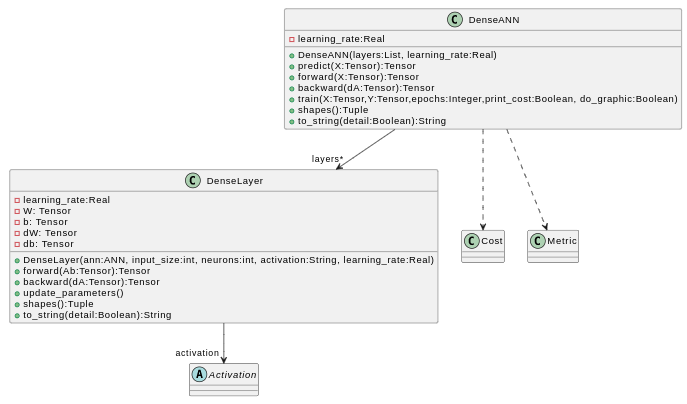

In [13]:
class DenseANN:
    """Representa una red neuronal totalmente conectada (multicapa)."""

    def __init__(self, layers: list, learning_rate: float):
        """Inicializa la arquitectura de la red y la tasa de aprendizaje.

        Args:
            layers (list): estructura de la red [input_size, hidden1, ..., output_size]
            learning_rate (float): tasa de aprendizaje
        """
        self.learning_rate = learning_rate
        self.layers = []

        for i in range(1, len(layers)):
            # Por defecto usamos 'relu' para todas las capas excepto la última
            activation = 'relu' if i < len(layers) - 1 else 'sigmoid'
            layer = DenseLayer(layers[i - 1], layers[i], activation, learning_rate)
            self.layers.append(layer)

        self.cost_function = Cost.use("crossentropy")
        self.metric = Metric.use("accuracy")
        self.costs = []

    def forward(self, X: np.ndarray) -> np.ndarray:
        """Propagación hacia adelante a través de todas las capas.

        Args:
            X (ndarray): entradas

        Returns:
            ndarray: predicción final
        """
        A = X
        for layer in self.layers:
            A = layer.forward(A)
        return A

    def backward(self, Y: np.ndarray, Yp: np.ndarray):
        """Propagación hacia atrás para actualizar gradientes.

        Args:
            Y (ndarray): etiquetas esperadas
            Yp (ndarray): predicciones obtenidas
        """
        dA = self.cost_function.derivative(Y, Yp)
        for layer in reversed(self.layers):
            dA = layer.backward(dA)

    def update_parameters(self):
        """Actualiza los parámetros de cada capa."""
        for layer in self.layers:
            layer.update_parameters()

    def predict(self, X: np.ndarray) -> np.ndarray:
      Yp = self.forward(X)
      return np.round(Yp).reshape(-1, 1)  # ← esto garantiza que Yp[i][0] sea válido


    def train(self, X: np.ndarray, Y: np.ndarray, epochs: int, print_cost: bool = True, do_graphic: bool = False):
        """Entrena la red neuronal.

        Args:
            X (ndarray): entradas
            Y (ndarray): etiquetas
            epochs (int): número de iteraciones
            print_cost (bool): mostrar costo por iteración
            do_graphic (bool): graficar evolución del costo
        """
        for epoch in range(epochs):
            Yp = self.forward(X)
            cost = self.cost_function.value(Y, Yp)
            self.costs.append(cost)

            self.backward(Y, Yp)
            self.update_parameters()

            if print_cost and epoch % 100 == 0:
                acc = self.metric.value(Y, np.round(Yp))
                print(f"Epoch {epoch} | Cost: {cost:.4f} | Accuracy: {acc:.4f}")

        if do_graphic:
            import matplotlib.pyplot as plt
            plt.plot(self.costs)
            plt.title("Evolución del costo")
            plt.xlabel("Épocas")
            plt.ylabel("Costo")
            plt.show()

    def shapes(self) -> list:
        """Devuelve las dimensiones de cada capa.

        Returns:
            list: lista de tuplas (input_size, neurons)
        """
        return [layer.shapes() for layer in self.layers]

    def to_string(self, detail: bool = False) -> str:
        """Devuelve una descripción textual de la red.

        Args:
            detail (bool): si es True, muestra pesos y sesgos

        Returns:
            str: descripción de la red
        """
        desc = "Arquitectura de la red:\n"
        for i, layer in enumerate(self.layers):
            desc += f"Capa {i}: {layer.to_string(detail)}\n"
        return desc


## CAPA CON PERCEPTRONES

In [14]:
class DenseLayer:
    """Representa una capa densa (oculta o de salida) en una red neuronal."""

    def __init__(self, input_size: int, neurons: int, activation: str, learning_rate: float):
      self.input_size = input_size
      self.neurons = neurons
      self.activation = Activation.use(activation)
      self.learning_rate = learning_rate

      self.W = np.random.randn(input_size, neurons) * 0.01
      self.b = np.zeros((1, neurons))
      self.dW = None
      self.db = None
      self.input = None
      self.output = None
      self.delta = None
      self.flag = True

    def forward(self, Ab: np.ndarray) -> np.ndarray:
      """Propagación hacia adelante: calcula activaciones de esta capa."""
      if Ab.ndim == 1:
          Ab = Ab.reshape(1, -1)  # ← convierte (input_size,) en (1, input_size)
      self.input = Ab
      Z = np.dot(Ab, self.W) + self.b
      self.output = self.activation.value(Z)
      return self.output

    def backward(self, Ab: np.ndarray) -> np.ndarray:
        """Propagación hacia atrás: calcula el gradiente y delta para esta capa.

        Args:
            Ab (ndarray): si es capa de salida → etiquetas esperadas (Y)
                          si es capa oculta → delta de la capa siguiente

        Returns:
            ndarray: delta para la capa anterior
        """
        if self.flag:  # capa de salida
            self.flag = False
            dZ = Ab  # delta ya calculado externamente (Yp - Y)
        else:  # capa oculta
            dZ = Ab * self.activation.derivative(self.output)

        self.dW = np.dot(self.input.T, dZ)
        self.db = np.sum(dZ, axis=0, keepdims=True)
        self.delta = np.dot(dZ, self.W.T)
        return self.delta

    def update_parameters(self):
        """Actualiza los pesos y sesgos usando el gradiente descendente."""
        self.W -= self.learning_rate * self.dW
        self.b -= self.learning_rate * self.db

    def shapes(self) -> tuple:
        """Devuelve las dimensiones de la capa.

        Returns:
            tuple: (input_size, neurons)
        """
        return (self.input_size, self.neurons)

    def to_string(self, detail: bool = False) -> str:
        """Devuelve una representación textual de la capa.

        Args:
            detail (bool): si es True, muestra pesos y sesgos

        Returns:
            str: descripción de la capa
        """
        base = f"DenseLayer({self.input_size} → {self.neurons}) con activación '{self.activation.__class__.__name__}'"
        if detail:
            base += f"\nPesos:\n{self.W}\nSesgos:\n{self.b}"
        return base


In [15]:
# Como primer caso de prueba entrene un perceptrón para calcular el operador lógico and. Explique los resultados.
import numpy as np

# Datos del operador lógico AND
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

Y = np.array([[0],
              [0],
              [0],
              [1]])

# Arquitectura: 2 entradas → 1 neurona de salida
layers = [2, 1]  # perceptrón simple

# Crear la red neuronal
model = DenseANN(layers=layers, learning_rate=0.1)

# Entrenar la red
model.train(X, Y, epochs=1000, print_cost=True, do_graphic=False)

# Realizar predicciones
Yp = model.predict(X)

# Mostrar resultados
print("\n🔍 Resultados del operador lógico AND:")
for i in range(len(X)):
    print(f"Entrada: {X[i]} → Esperado: {Y[i][0]} | Predicho: {int(Yp[i][0])}")


Epoch 0 | Cost: 0.6926 | Accuracy: 1.0000
Epoch 100 | Cost: 0.8273 | Accuracy: 1.0000
Epoch 200 | Cost: 0.6582 | Accuracy: 1.0000
Epoch 300 | Cost: 0.5498 | Accuracy: 1.0000
Epoch 400 | Cost: 0.4758 | Accuracy: 1.0000
Epoch 500 | Cost: 0.4212 | Accuracy: 1.0000
Epoch 600 | Cost: 0.3787 | Accuracy: 1.0000
Epoch 700 | Cost: 0.3445 | Accuracy: 1.0000
Epoch 800 | Cost: 0.3162 | Accuracy: 1.0000
Epoch 900 | Cost: 0.2923 | Accuracy: 1.0000

🔍 Resultados del operador lógico AND:
Entrada: [0 0] → Esperado: 0 | Predicho: 0
Entrada: [0 1] → Esperado: 0 | Predicho: 0
Entrada: [1 0] → Esperado: 0 | Predicho: 0
Entrada: [1 1] → Esperado: 1 | Predicho: 1


In [16]:
# Como segundo caso de prueba entrene un perceptrón para calcular el operador lógico or. Explique los resultados.
import numpy as np

# Datos del operador lógico OR
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

Y = np.array([[0],
              [1],
              [1],
              [1]])

# Arquitectura: 2 entradas → 1 neurona de salida
layers = [2, 1]  # perceptrón simple

# Crear la red neuronal
model = DenseANN(layers=layers, learning_rate=0.1)

# Entrenar la red
model.train(X, Y, epochs=1000, print_cost=True, do_graphic=False)

# Realizar predicciones
Yp = model.predict(X)

# Mostrar resultados
print("\n🔍 Resultados del operador lógico OR:")
for i in range(len(X)):
    print(f"Entrada: {X[i]} → Esperado: {Y[i][0]} | Predicho: {int(Yp[i][0])}")

Epoch 0 | Cost: 2.0836 | Accuracy: 1.0000
Epoch 100 | Cost: 0.5384 | Accuracy: 1.0000
Epoch 200 | Cost: 0.4289 | Accuracy: 1.0000
Epoch 300 | Cost: 0.3738 | Accuracy: 1.0000
Epoch 400 | Cost: 0.3309 | Accuracy: 1.0000
Epoch 500 | Cost: 0.2950 | Accuracy: 1.0000
Epoch 600 | Cost: 0.2649 | Accuracy: 1.0000
Epoch 700 | Cost: 0.2396 | Accuracy: 1.0000
Epoch 800 | Cost: 0.2182 | Accuracy: 1.0000
Epoch 900 | Cost: 0.2000 | Accuracy: 1.0000

🔍 Resultados del operador lógico OR:
Entrada: [0 0] → Esperado: 0 | Predicho: 0
Entrada: [0 1] → Esperado: 1 | Predicho: 1
Entrada: [1 0] → Esperado: 1 | Predicho: 1
Entrada: [1 1] → Esperado: 1 | Predicho: 1


In [17]:
# Como tercer caso de prueba entrene un perceptrón para calcular el operador lógico xor. Explique los resultados.
import numpy as np

# Datos del operador lógico XOR
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

Y = np.array([[0],
              [1],
              [1],
              [0]])

# Arquitectura: 2 entradas → 1 neurona de salida
layers = [2, 1]  # perceptrón simple

# Crear la red neuronal
model = DenseANN(layers=layers, learning_rate=0.1)

# Entrenar la red
model.train(X, Y, epochs=1000, print_cost=True, do_graphic=False)

# Realizar predicciones
Yp = model.predict(X)

# Mostrar resultados
print("\n🔍 Resultados del operador lógico XOR:")
for i in range(len(X)):
    print(f"Entrada: {X[i]} → Esperado: {Y[i][0]} | Predicho: {int(Yp[i][0])}")

print("Al no ser un problema lineal es practicamente imposible lograr la prediccion con solo una neurona")

Epoch 0 | Cost: 1.3689 | Accuracy: 1.0000
Epoch 100 | Cost: 1.3871 | Accuracy: 1.0000
Epoch 200 | Cost: 1.3872 | Accuracy: 1.0000
Epoch 300 | Cost: 1.3869 | Accuracy: 1.0000
Epoch 400 | Cost: 1.3867 | Accuracy: 1.0000
Epoch 500 | Cost: 1.3866 | Accuracy: 1.0000
Epoch 600 | Cost: 1.3865 | Accuracy: 1.0000
Epoch 700 | Cost: 1.3865 | Accuracy: 1.0000
Epoch 800 | Cost: 1.3864 | Accuracy: 1.0000
Epoch 900 | Cost: 1.3864 | Accuracy: 1.0000

🔍 Resultados del operador lógico XOR:
Entrada: [0 0] → Esperado: 0 | Predicho: 0
Entrada: [0 1] → Esperado: 1 | Predicho: 0
Entrada: [1 0] → Esperado: 1 | Predicho: 0
Entrada: [1 1] → Esperado: 0 | Predicho: 1


In [36]:
# Como cuarto caso de prueba entrene un perceptrón multicapa [2,2,1] para calcular el operador lógico xor. Explique los resultados
import numpy as np

# Datos del operador lógico XOR
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

Y = np.array([[0],
              [1],
              [1],
              [0]])

# Arquitectura: 2 entradas → 1 neurona de salida
layers = [2, 2, 1]  # perceptrón simple

# Crear la red neuronal
model = DenseANN(layers=layers, learning_rate=0.1)

# Entrenar la red
model.train(X, Y, epochs=5000, print_cost=True, do_graphic=False)

# Realizar predicciones
Yp = model.predict(X)

# Mostrar resultados
print("\n🔍 Resultados del operador lógico XOR:")
for i in range(len(X)):
    print(f"Entrada: {X[i]} → Esperado: {Y[i][0]} | Predicho: {int(Yp[i][0])}")
print("Como en este caso se usan varias neuronas, funciona de una manera mucho mas correcta, aunque muchas veces falla, hay veces que logra llegar al resultado correcto")

Epoch 0 | Cost: 1.3862 | Accuracy: 1.0000
Epoch 100 | Cost: 1.3863 | Accuracy: 1.0000
Epoch 200 | Cost: 1.3862 | Accuracy: 1.0000
Epoch 300 | Cost: 1.3858 | Accuracy: 1.0000
Epoch 400 | Cost: 1.3845 | Accuracy: 1.0000
Epoch 500 | Cost: 1.3797 | Accuracy: 1.0000
Epoch 600 | Cost: 1.3611 | Accuracy: 1.0000
Epoch 700 | Cost: 1.3020 | Accuracy: 1.0000
Epoch 800 | Cost: 1.1838 | Accuracy: 1.0000
Epoch 900 | Cost: 1.0312 | Accuracy: 1.0000
Epoch 1000 | Cost: 0.9371 | Accuracy: 1.0000
Epoch 1100 | Cost: 0.8864 | Accuracy: 1.0000
Epoch 1200 | Cost: 0.8596 | Accuracy: 1.0000
Epoch 1300 | Cost: 0.8448 | Accuracy: 1.0000
Epoch 1400 | Cost: 0.8360 | Accuracy: 1.0000
Epoch 1500 | Cost: 0.8301 | Accuracy: 1.0000
Epoch 1600 | Cost: 0.8257 | Accuracy: 1.0000
Epoch 1700 | Cost: 0.8205 | Accuracy: 1.0000
Epoch 1800 | Cost: 0.8090 | Accuracy: 1.0000
Epoch 1900 | Cost: 0.7802 | Accuracy: 1.0000
Epoch 2000 | Cost: 0.7048 | Accuracy: 1.0000
Epoch 2100 | Cost: 0.5633 | Accuracy: 1.0000
Epoch 2200 | Cost: 0.4

In [31]:
import pandas as pd
import pandas as pd

# --- Proceso de carga y preprocesamiento del dataset yeast.txt ---

# Cargar el dataset
data = pd.read_csv('yeast.txt', sep='\s+', header=None, engine='python')
data.columns = ['ID', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'class']

# Eliminar la columna 'ID'
data = data.drop('ID', axis=1)

# Separar características (X) y etiquetas (Y)
X_df = data.iloc[:, :-1]
Y_df = data.iloc[:, -1]

# Normalizar las características
X = X_df.values
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / (X_std + 1e-8)

# Codificar las etiquetas con One-Hot Encoding
classes = Y_df.unique()
class_map = {cls: i for i, cls in enumerate(classes)}
Y_encoded = Y_df.map(class_map)
Y_one_hot = np.zeros((len(Y_encoded), len(classes)))
Y_one_hot[np.arange(len(Y_encoded)), Y_encoded] = 1
Y = Y_one_hot

# --- Configuración y entrenamiento de la red neuronal ---

# Definir la arquitectura de la red
input_size = X.shape[1]
output_size = len(classes)
hidden_layer_size = 32

# Instanciar la red neuronal
ann = DenseANN(layers=[input_size, hidden_layer_size, output_size], learning_rate=0.01)

# Entrenar la red
print("Iniciando el entrenamiento...")
epochs = 20000
ann.train(X, Y, epochs=epochs)
print("Entrenamiento finalizado.")

# Evaluar el rendimiento final
Yp_final = ann.forward(X)
final_accuracy = ann.metric.value(Y, Yp_final)
print(f"\nPrecisión final del modelo: {final_accuracy:.4f}")

("La prediccion funciona con un accuracy aproximadamente de 0.65, nuestra conclusion es que la sigmoide la cual fue usada para este problema no era la mas acorde")


<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-4206284481.py:7: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('yeast.txt', sep='\s+', header=None, engine='python')


Iniciando el entrenamiento...
Epoch 0 | Cost: 1028.8978 | Accuracy: 0.1267
Epoch 100 | Cost: 1461.5687 | Accuracy: 0.4845
Epoch 200 | Cost: 1475.2382 | Accuracy: 0.4966
Epoch 300 | Cost: 1419.0370 | Accuracy: 0.5478
Epoch 400 | Cost: 1322.2495 | Accuracy: 0.5350
Epoch 500 | Cost: 1436.0024 | Accuracy: 0.5559
Epoch 600 | Cost: 1436.3234 | Accuracy: 0.5950
Epoch 700 | Cost: 1455.6373 | Accuracy: 0.5842
Epoch 800 | Cost: 1268.4369 | Accuracy: 0.5539
Epoch 900 | Cost: 1320.2535 | Accuracy: 0.5687
Epoch 1000 | Cost: 1407.4639 | Accuracy: 0.6112
Epoch 1100 | Cost: 1292.7470 | Accuracy: 0.5539
Epoch 1200 | Cost: 1225.3581 | Accuracy: 0.5761
Epoch 1300 | Cost: 1335.3845 | Accuracy: 0.5350
Epoch 1400 | Cost: 1312.3005 | Accuracy: 0.6024
Epoch 1500 | Cost: 1338.9589 | Accuracy: 0.5573
Epoch 1600 | Cost: 1281.4743 | Accuracy: 0.5863
Epoch 1700 | Cost: 1393.4086 | Accuracy: 0.5687
Epoch 1800 | Cost: 1260.7590 | Accuracy: 0.5943
Epoch 1900 | Cost: 1263.2033 | Accuracy: 0.5802
Epoch 2000 | Cost: 130

# PARTE 2. USO DE FRAMEWORK PARA REDES NEURONALES

Para este apartado se va a hacer uso de una librería que brinda de manera simplificada un entrenamiento flexible de distintas redes neuronales. En este caso será **Keras**

> Keras proporciona una interfaz Python simplificada para TensorFlow y se ha convertido en uno de los framework más usados en redes neuronales; especialmente las profundas. Cualquier código Keras que escribas se ejecuta en en TensorFlow (también se pueden utilizar CNTK y Theano como *back-end*, pero el desarrollo de estos se ha detenido).

Keras ofrece dos API: una [API secuencial](https://keras.io/guides/sequential_model/) y una [API funcional](https://keras.io/guides/functional_api/). La primera es más sencilla y resulta suficiente para la mayoría de las redes neuronales. La segunda es útil en escenarios  como redes con topologías no secuenciales o de capas compartidas. En nuestro caso usaremos el API secuencial.

---
Resuelvan un problema de clasificación usando el *dataset* definido por su profesor. (70% entrenamiento, 10% validación y 20% pruebas)

##Paso 1: Definir el problema
Antes de desarrollar un modelo, es fundamental establecer qué se quiere lograr y cómo se medirá el éxito. Esto implica explicar el problema, elegir una métrica adeucada y establecer un umbral de desempeño.


*Incluyan la respuesta*

##Paso 2: Explorar y preparar los datos
Para comprender la neturaleza de los datos que estamos utilizando es necesario **explorar** el *dataset* con visualizaciones adecuadas que permitan conocer la distribución de clases o valores, la presencia de valores nulos o atípicos y las correlaciones entre variables.

**Preparar** los datos para que la red pueda aprender de manera eficiente implica, entre otras cosas, la limpieza de datos, la normalización o estandarización de valores, la codificación de variables categóricas y la separación en conjuntos de entrenamiento (train), validación (dev) y prueba (test).

In [ ]:
#Analizar los datos

*Incluyan observaciones**

In [ ]:
#Preparar los datos separandolos en entrenamiento, validación y pruebas.

##Paso 3: Desarrollar la red

### Paso 3.1: Definir el modelo Keras

Crear una red neuronal utilizando la API secuencial de Keras es sencillo.

1. Se crea una instancia de la clase Sequential.
2. Se llama a *add* en el objeto *Sequential* para añadir capas. Las capas en sí mismas son instancias de clases como Dense, que representa una capa totalmente conectada con un número específico de neuronas que utilizan una función de activación específica.

In [ ]:
# Inicializar modelo Sequencial()
# Añadir capas de la clase Dense: .add(Dense(...))

### Paso 3.2: Compilar el modelo Keras

Una vez inicializado el modelo, hay que compilarlo. Para esto hay que definir las propiedades adicionales necesarias para entrenar la red.

Se debe especificar minimamente:
1. la **función de pérdida** que se utilizará para evaluar un conjunto de pesos
2. el **optimizador** utilizado para buscar diferentes pesos para la red, que en la versión clásica se usa el *gradiente descendente*, pero existen otros famosos como *ADAM*
3. la **métrica** que se desea reportar durante el entrenamiento.

In [ ]:
#Compilar el modelo

### Paso 3.3: Entrenar (Fit) el modelo Keras

Una vez compilado, es el momento de entrenar o ajustar el modelo con algunos datos. Para esto se hace llamando al método ***fit()*** del modelo.

Tenga en cuenta que el entrenamiento se realiza por épocas (*epoch*), y cada época se divide en lotes (*batch*).

1. **Epoch:** un ciclo/pasada por todas las observaciones del conjunto de datos de entrenamiento.
2. **Batch:** un ciclo de una o más observaciones en un *epoch* antes de que se actualicen los pesos.

In [ ]:
#Entrenar el modelo

### Paso 3.4: Evaluar el modelo Keras

Ya entrenada la red neuronal con todo el conjunto de datos de entrenamiento, se puede evaluar su rendimiento con otra serie de datos.

Para evaluar el modelo se puede hacer uso del método ***evaluate()*** agregandole los respectivos conjuntos de datos con su la salida esperada.

In [ ]:
#Evaluar el modelo

##Paso 4: Redactar conclusiones

*Incluyan las conclusiones*

## RETROSPECTIVA

**1.** ¿Cuál fue el tiempo total invertido en el laboratorio por cada uno de ustedes? (Horas/Hombre)

**2.** ¿Cuál es el estado actual del laboratorio? ¿Por qué?

**3.** ¿Cuál consideran fue el mayor logro? ¿Por qué?

**4.** ¿Cuál consideran que fue el mayor problema técnico? ¿Qué hicieron para resolverlo?

**5.** ¿Qué hicieron bien como equipo? ¿Qué se comprometen a hacer para mejorar los resultados?

**6**.¿Qué referencias usaron? ¿Cuál fue la más útil? Incluya citas con los estándares adecuados.

*Incluyan las respuesta*